# 📄 Resume / Candidate Screening System
# Future Interns – Machine Learning Task 3 


## 🎯 Objective
The goal of this project is to build a Machine Learning–based Resume Screening System that helps recruiters automatically evaluate and shortlist candidates efficiently.

## 🚀 What This System Does
This intelligent system:

- 📥 Reads and processes unstructured resume text  
- 🧹 Cleans and preprocesses resume content  
- 🔍 Compares resumes with a given job description  
- 📊 Calculates similarity scores using NLP techniques  
- 🏆 Ranks candidates based on job relevance  
- ⚠️ Identifies missing or weak skills in resumes  

## 💡 Project Significance
This project simulates how modern HR-tech platforms and recruitment systems automatically screen large volumes of resumes, reducing manual effort and improving hiring efficiency.


In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


## Step 1: Load the Dataset

We load the resume dataset which contains:
- ID
- Resume_str (raw resume text)
- Category

We will work mainly with the Resume_str column.


In [2]:
df = pd.read_csv("resume/Resume.csv")
df.head()


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


## Step 2: Download Required NLTK Resources

We download:
- punkt (for tokenization)
- stopwords (to remove common words like "the", "is")


In [28]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 3: Clean and Preprocess Resume Text

We clean the text by:
- Converting to lowercase
- Removing special characters
- Removing stopwords

This helps the model focus only on important words.


In [29]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z ]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['Cleaned_Resume'] = df['Resume_str'].apply(clean_text)

df[['Resume_str', 'Cleaned_Resume']].head()


,Resume_str,Cleaned_Resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,hr administratormarketing associatehr administ...
1,"HR SPECIALIST, US HR OPERATIONS ...",hr specialist us hr operations summary versati...
2,HR DIRECTOR Summary Over 2...,hr director summary years experience recruitin...
3,HR SPECIALIST Summary Dedica...,hr specialist summary dedicated driven dynamic...
4,HR MANAGER Skill Highlights ...,hr manager skill highlights hr skills hr depar...


## Step 4: Define Job Description

We manually provide a job description.
This will be compared with all resumes.


In [31]:
job_description = """
Looking for a Data Scientist with skills in Python, 
Machine Learning, SQL, Deep Learning and Data Analysis.
"""

cleaned_job = clean_text(job_description)


## Step 5: Convert Text to Numerical Form (TF-IDF)

TF-IDF converts text into numbers.
This allows the computer to measure similarity between resumes and job description.


In [32]:
tfidf = TfidfVectorizer()

all_text = df['Cleaned_Resume'].tolist()
all_text.append(cleaned_job)

tfidf_matrix = tfidf.fit_transform(all_text)


## Step 6: Calculate Similarity Score

We use cosine similarity to measure how close each resume is to the job description.

Score range:
- 0 = No similarity
- 1 = Perfect match


In [34]:
resume_vectors = tfidf_matrix[:-1]
job_vector = tfidf_matrix[-1]

similarity_scores = cosine_similarity(resume_vectors, job_vector)

df['Similarity_Score'] = similarity_scores


## Step 7: Rank Candidates

We sort resumes based on similarity score.
Higher score means better match with job description.


In [35]:
df_sorted = df.sort_values(by='Similarity_Score', ascending=False)

df_sorted[['ID', 'Similarity_Score']].head()


,ID,Similarity_Score
1762,12011623,0.220620
1218,21156767,0.207262
2153,34953092,0.189079
2291,12777487,0.173722
1142,30863060,0.160686


## Step 8: Extract Top Matching Skills

We extract the most important words from the job description 
and check which resumes contain those words.

This helps explain why a resume got a high score.


In [37]:
# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Get job description vector
job_vector_array = job_vector.toarray()[0]

# Get top important words in job description
top_indices = job_vector_array.argsort()[-10:][::-1]

top_keywords = [feature_names[i] for i in top_indices]

print("Top Job Keywords:")
print(top_keywords)


Top Job Keywords:
['scientist', 'learning', 'python', 'deep', 'machine', 'looking', 'sql', 'data', 'analysis', 'skills']


## Step 9: Display Top 5 Candidates with Explanation

We show:
- Resume ID
- Similarity score
- Category


In [39]:
top_candidates = df_sorted[['ID', 'Category', 'Similarity_Score']].head(5)

top_candidates


,ID,Category,Similarity_Score
1762,12011623,ENGINEERING,0.220620
1218,21156767,CONSULTANT,0.207262
2153,34953092,BANKING,0.189079
2291,12777487,ARTS,0.173722
1142,30863060,CONSULTANT,0.160686


## Step 10: Visualize Similarity Scores

We plot similarity scores of top 10 candidates.


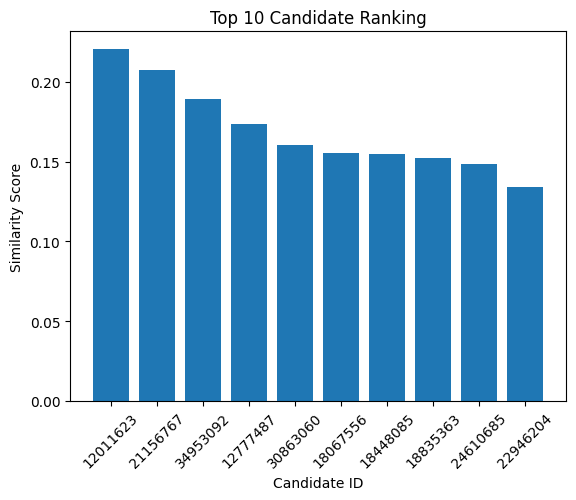

In [40]:
import matplotlib.pyplot as plt

top10 = df_sorted.head(10)

plt.figure()
plt.bar(top10['ID'].astype(str), top10['Similarity_Score'])
plt.xlabel("Candidate ID")
plt.ylabel("Similarity Score")
plt.title("Top 10 Candidate Ranking")
plt.xticks(rotation=45)
plt.show()


In [42]:
df_sorted.head(50).to_csv("Resume_Ranking_Sample.csv", index=False)



## Future Improvements

- Use advanced NLP models like BERT
- Extract skills using predefined skill lists
- Build a web application interface
- Allow multiple job descriptions


## Conclusion

This project builds a resume screening system using NLP techniques.
It preprocesses resume text, extracts important keywords using TF-IDF,
calculates similarity using cosine similarity, and ranks candidates 
based on job relevance.

This system can help HR professionals shortlist candidates efficiently.
